# 4.8 Assignment 4: Decision Trees and Random Forest
This dataset has 93 entries of various blues guitarists born between 1874 and 1940. Apart from the name of the guitarists, that dataset contains the following four features:<p>
 - Regions: 1 means East, 2 means Delta, 3 means Texas
 - Years: 0 for those born before 1906, 1 for the rest
 - Hand postures: 1= Extended, 2= Stacked, 3=Lutiform
 - Thumb styles: Between 1 and 3, 1=Alternating, 2=Utility, 3=Dead

Step 1: Using decision tree on this dataset, how accurately you can predict their <b>"period", ie born before or after 1906 (as per Professor)</b> from their hand postures and thumb styles. How does it affect the evaluation when you include the region while training the model?<p>

Step 2: Now do the same using random forest (in both of the above cases) and report the difference. Make sure to use appropriate training-testing parameters for your evaluation.<p>

You should also run the algorithms multiple times, measure various accuracies, and report the average (and perhaps the range).

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
df = pd.read_csv('Assignment 4-blues_hand.csv')
print(df.columns)
display(df.head(93))

Index(['name', 'state', 'brthYr', 'post1906', 'region', 'handPost',
       'thumbSty'],
      dtype='object')


,name,state,brthYr,post1906,region,handPost,thumbSty
0,Henry Thomas,TX,1874,0,3,1,3
1,Frank Stokes,TN,1887,0,2,1,3
2,Sam Collins,MS,1887,0,2,1,2
3,Peg Leg Howell,GA,1888,0,1,2,2
4,Huddie Ledbetter,TX,1888,0,3,2,3
...,...,...,...,...,...,...,...
88,Jimmie Lee Harris,AL,1935,1,2,2,3
89,Snooks Eaglin,LA,1936,1,2,1,2
90,Larry Johnson,GA,1938,1,1,1,1
91,Tom Winslow,NC,1938,1,1,1,1


In [5]:
df.describe()

,brthYr,post1906,region,handPost,thumbSty
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,1908.903226,0.548387,1.741935,1.580645,2.043011
std,13.448020,0.500351,0.657783,0.712048,0.832936
min,1874.000000,0.000000,1.000000,1.000000,1.000000
25%,1898.000000,0.000000,1.000000,1.000000,1.000000
50%,1908.000000,1.000000,2.000000,1.000000,2.000000
75%,1917.000000,1.000000,2.000000,2.000000,3.000000
max,1940.000000,1.000000,3.000000,3.000000,3.000000


In [6]:
def count_nan(df: pd.DataFrame) -> pd.Series:
    """Counts the number of NaN (Not a Number) values in each column of a Pandas DataFrame.
    """
    if df.empty:
        return pd.Series(dtype=int)  # Return an empty Series if df is empty
    nan_counts = df.isnull().sum()
    return nan_counts
count_nan(df)

name        0
state       0
brthYr      0
post1906    0
region      0
handPost    0
thumbSty    0
dtype: int64

# Step 1 - Decision Tree
a. How accurately you can tell their period/post1906 from their hand postures and thumb styles?<p>
b. How does it affect the evaluation when you include the region while training the model?

In [10]:
# Define features (X) and target (y)
y = df['post1906']

for p in [['handPost', 'thumbSty'], ['region', 'handPost', 'thumbSty']]:
    X = df[p]
    print(f'DecisionTreeClassifier with features {p}')
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize and train a Decision Tree Classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

DecisionTreeClassifier with features ['handPost', 'thumbSty']
Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        15
           1       0.59      1.00      0.74        13

    accuracy                           0.68        28
   macro avg       0.80      0.70      0.66        28
weighted avg       0.81      0.68      0.65        28


Confusion Matrix:
[[ 6  9]
 [ 0 13]]
DecisionTreeClassifier with features ['region', 'handPost', 'thumbSty']
Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.40      0.46        15
           1       0.47      0.62      0.53        13

    accuracy                           0.50        28
   macro avg       0.51      0.51      0.50        28
weighted avg       0.51      0.50      0.49        28


Confusion Matrix:
[[6 9]
 [5 8]]


This confusion matrix corresponds to the DecisionTreeClassifier with features ['handPost', 'thumbSty'] which had:<p>
 - Accuracy: 68%<p>
 - Recall for class 0: 6 / (6 + 9) = 6 / 15 = 40%<p>
 - Recall for class 1: 13 / (0 + 13) = 13 / 13 = 100%<p>
 - Precision for class 0: 6 / (6 + 0) = 6 / 6 = 100%<p>
 - Precision for class 1: 13 / (9 + 13) = 13 / 22 = 59%<p>
    
What it tells us about the model's performance:<p>
 - The model is very good at identifying instances of class 1 (high recall, no false negatives).<p>
 - However, it struggles with class 0, frequently misclassifying them as class 1 (high false positive rate, leading to lower recall for class 0).<p>
 - When the model predicts class 0, it is always correct (high precision for class 0).<p>
 - When the model predicts class 1, it is correct about 59% of the time (precision for class 1).<p>

So, while the overall accuracy is 0.68, the model exhibits a bias towards predicting class 1. Depending on the specific goals of your classification task, this might be acceptable or require further improvement, especially in reducing the false positive rate for class 1.

DecisionTreeClassifier with features ['region', 'handPost', 'thumbSty']
Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        15
           1       0.59      1.00      0.74        13

    accuracy                           0.68        28
   macro avg       0.80      0.70      0.66        28
weighted avg       0.81      0.68      0.65        28


Confusion Matrix:
[[ 6  9]
 [ 0 13]]


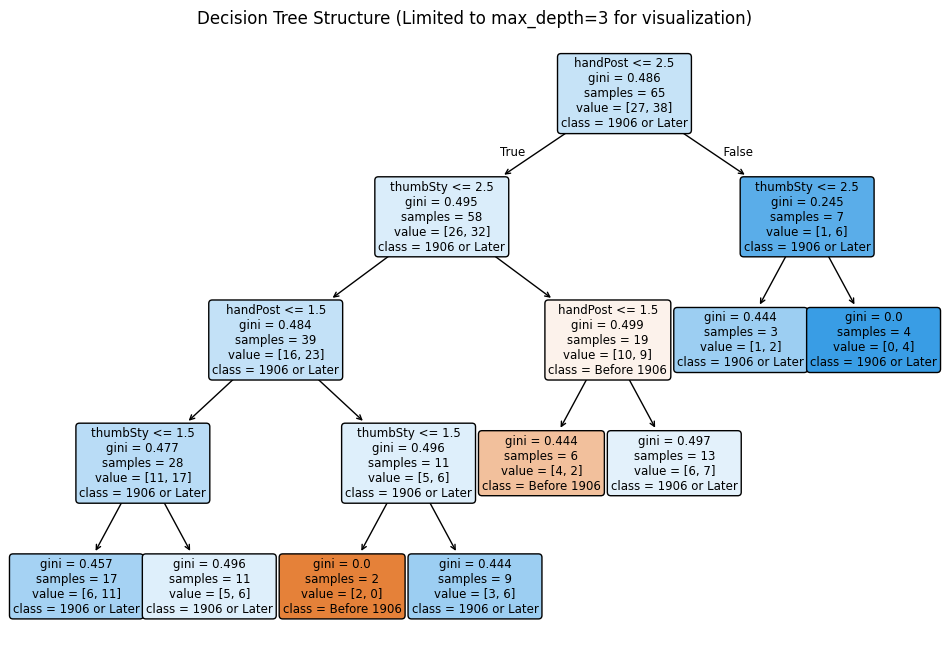

In [18]:
X = df[['handPost', 'thumbSty']]
y = df['post1906']
print(f'DecisionTreeClassifier with features {p}')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize and train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
    
# --- Visualize the Decision Tree ---
plt.figure(figsize=(12, 8))
plot_tree(clf,
          feature_names=X.columns,
          class_names=['Before 1906', '1906 or Later'],
          filled=True,
          rounded=True)
plt.title("Decision Tree Structure (Limited to max_depth=3 for visualization)")
plt.show()

Since we only are getting 68% accuracy, we will try experimenting with hyperparameters.

In [51]:
# Load data (replace with your actual data)
X = df[['handPost', 'thumbSty']]  # Example feature columns
y = df['post1906']  # Example target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Experiment with different parameters for DecisionTreeClassifier

# 1. Criterion: Gini vs Entropy
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# 2. Splitter: Best vs Random
clf_best = DecisionTreeClassifier(splitter='best', random_state=42)
clf_random = DecisionTreeClassifier(splitter='random', random_state=42)

# 3. Max Depth: None vs limited depth
clf_depth_none = DecisionTreeClassifier(max_depth=None, random_state=42)
clf_depth_3 = DecisionTreeClassifier(max_depth=3, random_state=42)

# 4. Min Samples Split: 2 vs higher values
clf_min_samples_2 = DecisionTreeClassifier(min_samples_split=2, random_state=42)
clf_min_samples_10 = DecisionTreeClassifier(min_samples_split=10, random_state=42)

# List of classifiers to experiment with
classifiers = [clf_gini, clf_entropy, clf_best, clf_random, clf_depth_none, clf_depth_3, clf_min_samples_2, clf_min_samples_10]
class_desc = ['criterion=gini', 'criterion=entropy', 'splitter=best', 'splitter=random', 
              'max_depth=None', 'max_depth=3', 'min_samples_split=2', 'min_samples_split=10']
# Train, evaluate, and print results for each classifier
for i, clf in enumerate(classifiers):
    clf_name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf_name} with {class_desc[i]}, Accuracy: {accuracy:.2f}")
    #print(f"\n{clf_name} - Accuracy: {accuracy:.2f}")
    # print(classification_report(y_test, y_pred))

DecisionTreeClassifier with criterion=gini, Accuracy: 0.68
DecisionTreeClassifier with criterion=entropy, Accuracy: 0.68
DecisionTreeClassifier with splitter=best, Accuracy: 0.68
DecisionTreeClassifier with splitter=random, Accuracy: 0.68
DecisionTreeClassifier with max_depth=None, Accuracy: 0.68
DecisionTreeClassifier with max_depth=3, Accuracy: 0.64
DecisionTreeClassifier with min_samples_split=2, Accuracy: 0.68
DecisionTreeClassifier with min_samples_split=10, Accuracy: 0.68


In [48]:
X = df[['handPost', 'thumbSty']]  # Example feature columns
y = df['post1906']  # Example target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10, splitter='best', random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.68


In [44]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

Best parameters found:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10, 'splitter': 'best'}
Best cross-validation score: 0.49


# Step 2
Use random forest (in both of the above cases) and report the difference. Make sure to use appropriate training-testing parameters for your evaluation.<p>

You should also run the algorithms multiple times, measure various accuracies, and report the average (and perhaps the range).

In [20]:
# Define features (X) and target (y)
y = df['post1906']

for p in [['handPost', 'thumbSty'], ['region', 'handPost', 'thumbSty']]:
    X = df[p]
    print(f'RandomForestClassifier with features {p}')
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize and train a Decision Tree Classifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

RandomForestClassifier with features ['handPost', 'thumbSty']
Accuracy: 0.64

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.40      0.55        15
           1       0.57      0.92      0.71        13

    accuracy                           0.64        28
   macro avg       0.71      0.66      0.63        28
weighted avg       0.72      0.64      0.62        28


Confusion Matrix:
[[ 6  9]
 [ 1 12]]
RandomForestClassifier with features ['region', 'handPost', 'thumbSty']
Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.40      0.46        15
           1       0.47      0.62      0.53        13

    accuracy                           0.50        28
   macro avg       0.51      0.51      0.50        28
weighted avg       0.51      0.50      0.49        28


Confusion Matrix:
[[6 9]
 [5 8]]


In [25]:
X = df[['handPost', 'thumbSty']]
y = df['post1906']
print(f'RandomForestClassifier with features {p}')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize and train a Decision Tree Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

RandomForestClassifier with features ['region', 'handPost', 'thumbSty']
Accuracy: 0.64

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.40      0.55        15
           1       0.57      0.92      0.71        13

    accuracy                           0.64        28
   macro avg       0.71      0.66      0.63        28
weighted avg       0.72      0.64      0.62        28


Confusion Matrix:
[[ 6  9]
 [ 1 12]]


In [29]:
clf = RandomForestClassifier(random_state=42)

# Cross-validation (5 folds in this example)
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Average cross-validated accuracy: {cv_scores.mean():.2f}")

# To get classification report and confusion matrix, use cross_val_predict
y_pred = cross_val_predict(clf, X, y, cv=5)

print("\nClassification Report:")
print(classification_report(y, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

Cross-validated accuracy scores: [0.52631579 0.52631579 0.68421053 0.72222222 0.55555556]
Average cross-validated accuracy: 0.60

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.36      0.45        42
           1       0.60      0.80      0.69        51

    accuracy                           0.60        93
   macro avg       0.60      0.58      0.57        93
weighted avg       0.60      0.60      0.58        93


Confusion Matrix:
[[15 27]
 [10 41]]


In [32]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict

# Stratified K-Fold ensures that each fold has a similar distribution of classes
skf = StratifiedKFold(n_splits=5)

# Get the cross-validated predictions
y_pred = cross_val_predict(clf, X, y, cv=skf)

# Now, get the accuracy score for each fold
cv_scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Best fold accuracy: {max(cv_scores)}")

# Find the fold index with best accuracy (0.72222)
best_fold_index = np.argmax(cv_scores)
print(best_fold_index)

# To get predictions specifically from the fold with 0.72222 accuracy, we can use that index
# But cross_val_predict already averages over all folds, so if you're asking for a single fold,
# it's better to just inspect the results and metrics like classification report across folds

print("\nClassification Report (all folds):")
print(classification_report(y, y_pred))

print("\nConfusion Matrix (all folds):")
print(confusion_matrix(y, y_pred))


Cross-validated accuracy scores: [0.52631579 0.52631579 0.68421053 0.72222222 0.55555556]
Best fold accuracy: 0.7222222222222222
3

Classification Report (all folds):
              precision    recall  f1-score   support

           0       0.60      0.36      0.45        42
           1       0.60      0.80      0.69        51

    accuracy                           0.60        93
   macro avg       0.60      0.58      0.57        93
weighted avg       0.60      0.60      0.58        93


Confusion Matrix (all folds):
[[15 27]
 [10 41]]
